In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
troop_df = pd.read_csv("troop_movements.csv")

In [6]:
troop_df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-09 08:39:17,1,resistance_soldier,empire,9,4,5,6,Champala
1,2025-07-09 08:39:16,2,stormtrooper,resistance,1,2,9,2,Bestine IV
2,2025-07-09 08:39:15,3,unknown,resistance,10,1,1,2,Malastare
3,2025-07-09 08:39:14,4,at-st,empire,2,5,4,1,Ojom
4,2025-07-09 08:39:13,5,unknown,resistance,5,7,7,5,Socorro


In [7]:
troop_df.columns

Index(['timestamp', 'unit_id', 'unit_type', 'empire_or_resistance',
       'location_x', 'location_y', 'destination_x', 'destination_y',
       'homeworld'],
      dtype='object')

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_10704\50904319.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='empire_or_resistance', data=troop_df,palette=colors)


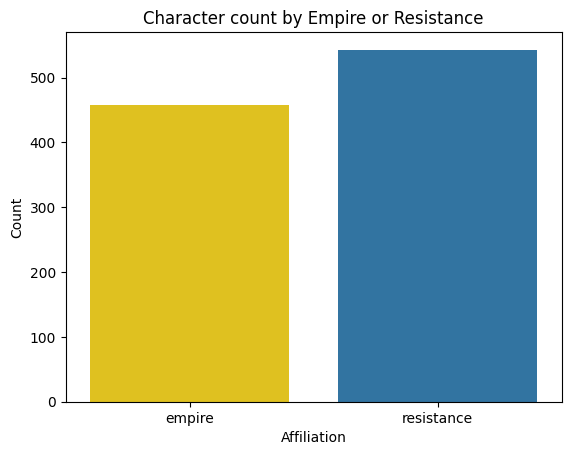

In [16]:
colors = {
    'resistance': '#1f77b4',  
    'empire': '#FFD700'       
}


sns.countplot(x='empire_or_resistance', data=troop_df,palette=colors)
plt.title('Character count by Empire or Resistance')
plt.xlabel('Affiliation')
plt.ylabel('Count')
plt.savefig('affiliation_chart.png')
plt.show()




In [44]:
X = troop_df[['homeworld', 'unit_type']]
y = troop_df['empire_or_resistance']
X,y

(       homeworld           unit_type
 0       Champala  resistance_soldier
 1     Bestine IV        stormtrooper
 2      Malastare             unknown
 3           Ojom               at-st
 4        Socorro             unknown
 ..           ...                 ...
 995  Aleen Minor        stormtrooper
 996        Kalee         tie_fighter
 997    Chandrila  resistance_soldier
 998      Stewjon               at-st
 999     Kashyyyk               at-st
 
 [1000 rows x 2 columns],
 0          empire
 1      resistance
 2      resistance
 3          empire
 4      resistance
           ...    
 995    resistance
 996        empire
 997    resistance
 998        empire
 999    resistance
 Name: empire_or_resistance, Length: 1000, dtype: object)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("train_test_split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

train_test_split:
X_train shape: (800, 2)
X_test shape: (200, 2)
y_train shape: (800,)
y_test shape: (200,)


In [33]:
from sklearn.compose import ColumnTransformer

In [34]:
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['homeworld', 'unit_type'])
    ],
    remainder='passthrough'
)

In [46]:

X_train_encoded = encoder.fit_transform(X_train)


X_test_encoded = encoder.transform(X_test)

In [47]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_encoded, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
y_pred = model.predict(X_test_encoded)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625
